### Tarea - Pandas, Polars y gráficas

Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para Enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:
* Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
* Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero
* Qué tipo de taxi recibe más propinas en promedio
* Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi
* Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero
* Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

### Bibliotecas

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

In [2]:
yellow_taxis_df = pl.read_parquet('./data/yellow_tripdata_2025-01.parquet')
green_taxis_df = pl.read_parquet('./data/green_tripdata_2025-01.parquet')
fhv_df = pl.read_parquet('./data/fhv_tripdata_2025-01.parquet')
fhvhv_df = pl.read_parquet('./data/fhvhv_tripdata_2025-01.parquet')

In [3]:
yellow_taxis_df.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
i32,datetime[μs],datetime[μs],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2025-01-01 00:18:38,2025-01-01 00:26:59,1,1.6,1,"""N""",229,237,1,10.0,3.5,0.5,3.0,0.0,1.0,18.0,2.5,0.0,0.0
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1,0.5,1,"""N""",236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
1,2025-01-01 00:44:04,2025-01-01 00:46:01,1,0.6,1,"""N""",141,141,1,5.1,3.5,0.5,2.0,0.0,1.0,12.1,2.5,0.0,0.0
2,2025-01-01 00:14:27,2025-01-01 00:20:01,3,0.52,1,"""N""",244,244,2,7.2,1.0,0.5,0.0,0.0,1.0,9.7,0.0,0.0,0.0
2,2025-01-01 00:21:34,2025-01-01 00:25:06,3,0.66,1,"""N""",244,116,2,5.8,1.0,0.5,0.0,0.0,1.0,8.3,0.0,0.0,0.0


In [4]:
green_taxis_df.head()

VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
i32,datetime[μs],datetime[μs],str,i64,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64
2,2025-01-01 00:03:01,2025-01-01 00:17:12,"""N""",1,75,235,1,5.93,24.7,1.0,0.5,6.8,0.0,null,1.0,34.0,1,1,0.0,0.0
2,2025-01-01 00:19:59,2025-01-01 00:25:52,"""N""",1,166,75,1,1.32,8.6,1.0,0.5,0.0,0.0,null,1.0,11.1,2,1,0.0,0.0
2,2025-01-01 00:05:29,2025-01-01 00:07:21,"""N""",5,171,73,1,0.41,25.55,0.0,0.0,0.0,0.0,null,1.0,26.55,2,2,0.0,0.0
2,2025-01-01 00:52:24,2025-01-01 01:07:52,"""N""",1,74,223,1,4.12,21.2,1.0,0.5,6.13,6.94,null,1.0,36.77,1,1,0.0,0.0
2,2025-01-01 00:25:05,2025-01-01 01:01:10,"""N""",1,66,158,1,4.71,33.8,1.0,0.5,7.81,0.0,null,1.0,46.86,1,1,2.75,0.0


In [5]:
fhv_df.head()

dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
str,datetime[μs],datetime[μs],i64,i64,i64,str
"""B00009""",2025-01-01 00:20:00,2025-01-01 00:57:00,null,null,null,"""B00009"""
"""B00013""",2025-01-01 00:40:00,2025-01-01 02:21:00,null,null,null,"""B00888"""
"""B00112""",2025-01-01 00:22:59,2025-01-01 00:45:28,null,108,null,"""B00112"""
"""B00112""",2025-01-01 00:32:57,2025-01-01 00:33:10,null,14,null,"""B00112"""
"""B00112""",2025-01-01 00:46:48,2025-01-01 00:49:51,null,14,null,"""B00112"""


In [6]:
fhvhv_df.head()

hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee
str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],i32,i32,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64
"""HV0003""","""B03404""","""B03404""",2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.32,1259,18.21,0.0,0.46,1.5,2.75,0.0,0.0,15.71,"""N""","""N""","""N""","""N""","""N""",0.0
"""HV0005""","""B03406""",null,2025-01-01 00:18:33,null,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,723,16.97,0.0,0.47,1.51,0.0,0.0,0.0,23.57,"""N""","""N""","""N""","""N""","""N""",0.0
"""HV0003""","""B03404""","""B03404""",2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.43,2874,40.36,0.0,1.18,3.8,0.0,2.5,0.0,47.75,"""N""","""N""","""N""","""N""","""N""",0.0
"""HV0003""","""B03404""","""B03404""",2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.82,264,12.24,0.0,0.34,1.08,0.0,0.0,0.0,12.2,"""N""","""N""","""N""","""N""","""N""",0.0
"""HV0003""","""B03404""","""B03404""",2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.61,457,19.76,0.0,0.54,1.76,0.0,0.0,0.0,17.67,"""N""","""N""","""N""","""N""","""N""",0.0


### Informe estadístico

Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [7]:
yellow_taxis_mean = yellow_taxis_df["total_amount"].mean()
green_taxis_mean = green_taxis_df["total_amount"].mean()

fhvhv_total_amount = (
    fhvhv_df["base_passenger_fare"]
    + fhvhv_df["tolls"]
    + fhvhv_df["bcf"]
    + fhvhv_df["sales_tax"]
    + fhvhv_df["congestion_surcharge"]
    + fhvhv_df["airport_fee"]
    + fhvhv_df["cbd_congestion_fee"]
)
fhvhv_mean = fhvhv_total_amount.mean()

total_sum = (
    yellow_taxis_df["total_amount"].sum()
    + green_taxis_df["total_amount"].sum()
    + fhvhv_total_amount.sum()
)

total_count = (
    yellow_taxis_df["total_amount"].count()
    + green_taxis_df["total_amount"].count()
    + fhvhv_total_amount.count()
)
overall_mean = total_sum / total_count

print(f"Promedio taxis amarillos: ${yellow_taxis_mean:.2f}")
print(f"Promedio taxis verdes: ${green_taxis_mean:.2f}")
print(f"Promedio taxis FHVHV: ${fhvhv_mean:.2f}")
print(f"Promedio de todos los taxis: ${overall_mean:.2f}")

Promedio taxis amarillos: $25.61
Promedio taxis verdes: $22.63
Promedio taxis FHVHV: $29.66
Promedio de todos los taxis: $29.06


Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [8]:
green_taxis_df = green_taxis_df.filter(pl.col("trip_distance") < 1000)
yellow_taxis_df = yellow_taxis_df.filter(pl.col("trip_distance") < 1000)
fhvhv_df = fhvhv_df.filter(pl.col("trip_miles") < 1000)

yellow_total_distance = yellow_taxis_df["trip_distance"].sum()
green_total_distance = green_taxis_df["trip_distance"].sum()
fhvhv_total_distance = fhvhv_df["trip_miles"].sum()

print(f"Distancia total taxis amarillos: {yellow_total_distance:,.2f} millas")
print(f"Distancia total taxis verdes: {green_total_distance:,.2f} millas")
print(f"Distancia total taxis FHVHV: {fhvhv_total_distance:,.2f} millas")
print(f"Distancia total taxis: {sum((yellow_total_distance, green_total_distance, fhvhv_total_distance)):,.2f} millas")

yellow_trip_count = len(yellow_taxis_df)
green_trip_count = len(green_taxis_df)
fhvhv_trip_count = len(fhvhv_df)

print(f"\nTotal de viajes taxis amarillos: {yellow_trip_count}")
print(f"Total de viajes taxis verdes: {green_trip_count}")
print(f"Total de viajes taxis FHVHV: {fhvhv_trip_count}")
print(f"Total de viajes taxis: {sum((yellow_trip_count, green_trip_count, fhvhv_trip_count))}")

yellow_avg_distance = yellow_total_distance / yellow_trip_count
green_avg_distance = green_total_distance / green_trip_count
fhvhv_avg_distance = fhvhv_total_distance / fhvhv_trip_count

print(f"\nDistancia promedio por viaje taxis amarillos: {yellow_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis verdes: {green_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis FHVHV: {fhvhv_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis: {sum((yellow_avg_distance, green_avg_distance, fhvhv_avg_distance)):,.2f} millas")

Distancia total taxis amarillos: 10,761,278.29 millas
Distancia total taxis verdes: 122,983.48 millas
Distancia total taxis FHVHV: 98,978,656.51 millas
Distancia total taxis: 109,862,918.28 millas

Total de viajes taxis amarillos: 3475110
Total de viajes taxis verdes: 48305
Total de viajes taxis FHVHV: 20405666
Total de viajes taxis: 23929081

Distancia promedio por viaje taxis amarillos: 3.10 millas
Distancia promedio por viaje taxis verdes: 2.55 millas
Distancia promedio por viaje taxis FHVHV: 4.85 millas
Distancia promedio por viaje taxis: 10.49 millas


Los taxis FHVHV recorrieron la mayor cantidad de distancia en enero, con un total de $98,978,656.51$ millas. También fueron los que más distancia recorrieron en promedio, con un total de $4.85$ millas.

¿Qué tipo de taxi recibe más propinas en promedio?

In [9]:
yellow_avg_tip = yellow_taxis_df["tip_amount"].mean()
green_avg_tip = green_taxis_df["tip_amount"].mean()
fhvhv_avg_tip = fhvhv_df["tips"].mean()

print(f"Propina promedio taxis amarillos: ${yellow_avg_tip:.2f}")
print(f"Propina promedio taxis verdes: ${green_avg_tip:.2f}")
print(f"Propina promedio taxis FHVHV: ${fhvhv_avg_tip:.2f}")

total_tip_sum = (
    yellow_taxis_df["tip_amount"].sum()
    + green_taxis_df["tip_amount"].sum()
    + fhvhv_df["tips"].sum()
)
total_tip_count = (len(yellow_taxis_df) + len(green_taxis_df) + len(fhvhv_df))
overall_tip_mean = total_tip_sum / total_tip_count
print(f"Propina promedio de todos los taxis: ${overall_tip_mean:.2f}")

Propina promedio taxis amarillos: $2.96
Propina promedio taxis verdes: $2.48
Propina promedio taxis FHVHV: $1.04
Propina promedio de todos los taxis: $1.32


Los taxis amarillos reciben la mayor cantidad de propinas en promedio, con un total de $ $2.96$ por viaje.

Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi.

In [10]:
toll_data = {
    'Tipo de Taxi': ['Amarillo', 'Verde', 'FHVHV'],
    'Total de Peajes': [
        yellow_taxis_df['tolls_amount'].sum(),
        green_taxis_df['tolls_amount'].sum(),
        fhvhv_df['tolls'].sum()
    ]
}

df_tolls = pl.DataFrame(toll_data)
df_tolls = df_tolls.sort("Total de Peajes", descending=True)

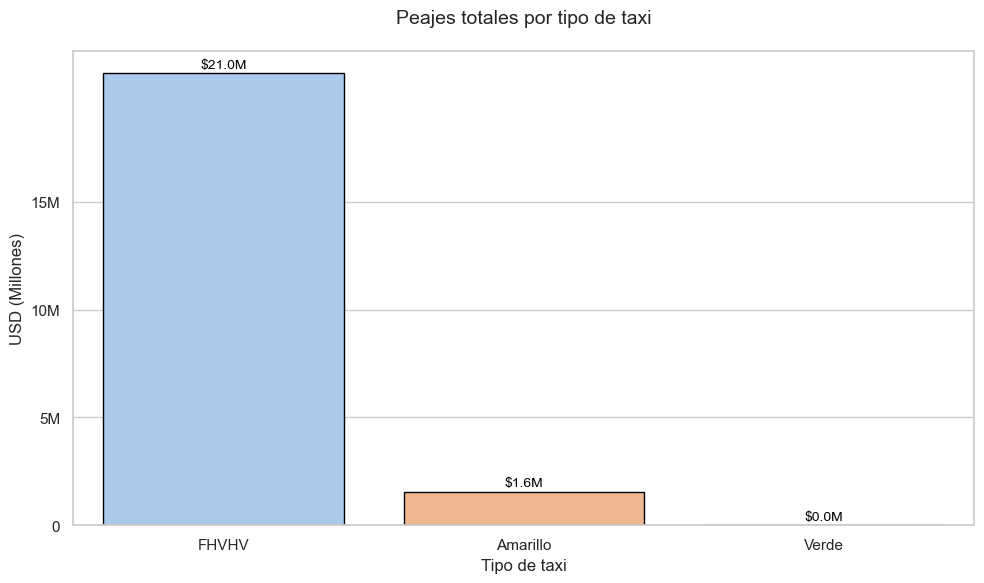

In [11]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    x='Tipo de Taxi',
    y='Total de Peajes',
    data=df_tolls,
    edgecolor='black',
    hue='Tipo de Taxi',
    dodge=False,
    palette="pastel",
)

plt.title('Peajes totales por tipo de taxi', fontsize=14, pad=20)
plt.xlabel('Tipo de taxi', fontsize=12)
plt.ylabel('USD (Millones)', fontsize=12)
plt.yticks([0, 5e6, 1e7, 1.5e7], ['0', '5M', '10M', '15M'])

# Anotaciones
for i, value in enumerate(df_tolls['Total de Peajes']):
    barplot.annotate(
        f'${value/1e6:.1f}M',
        (i, value + 0.1e6),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

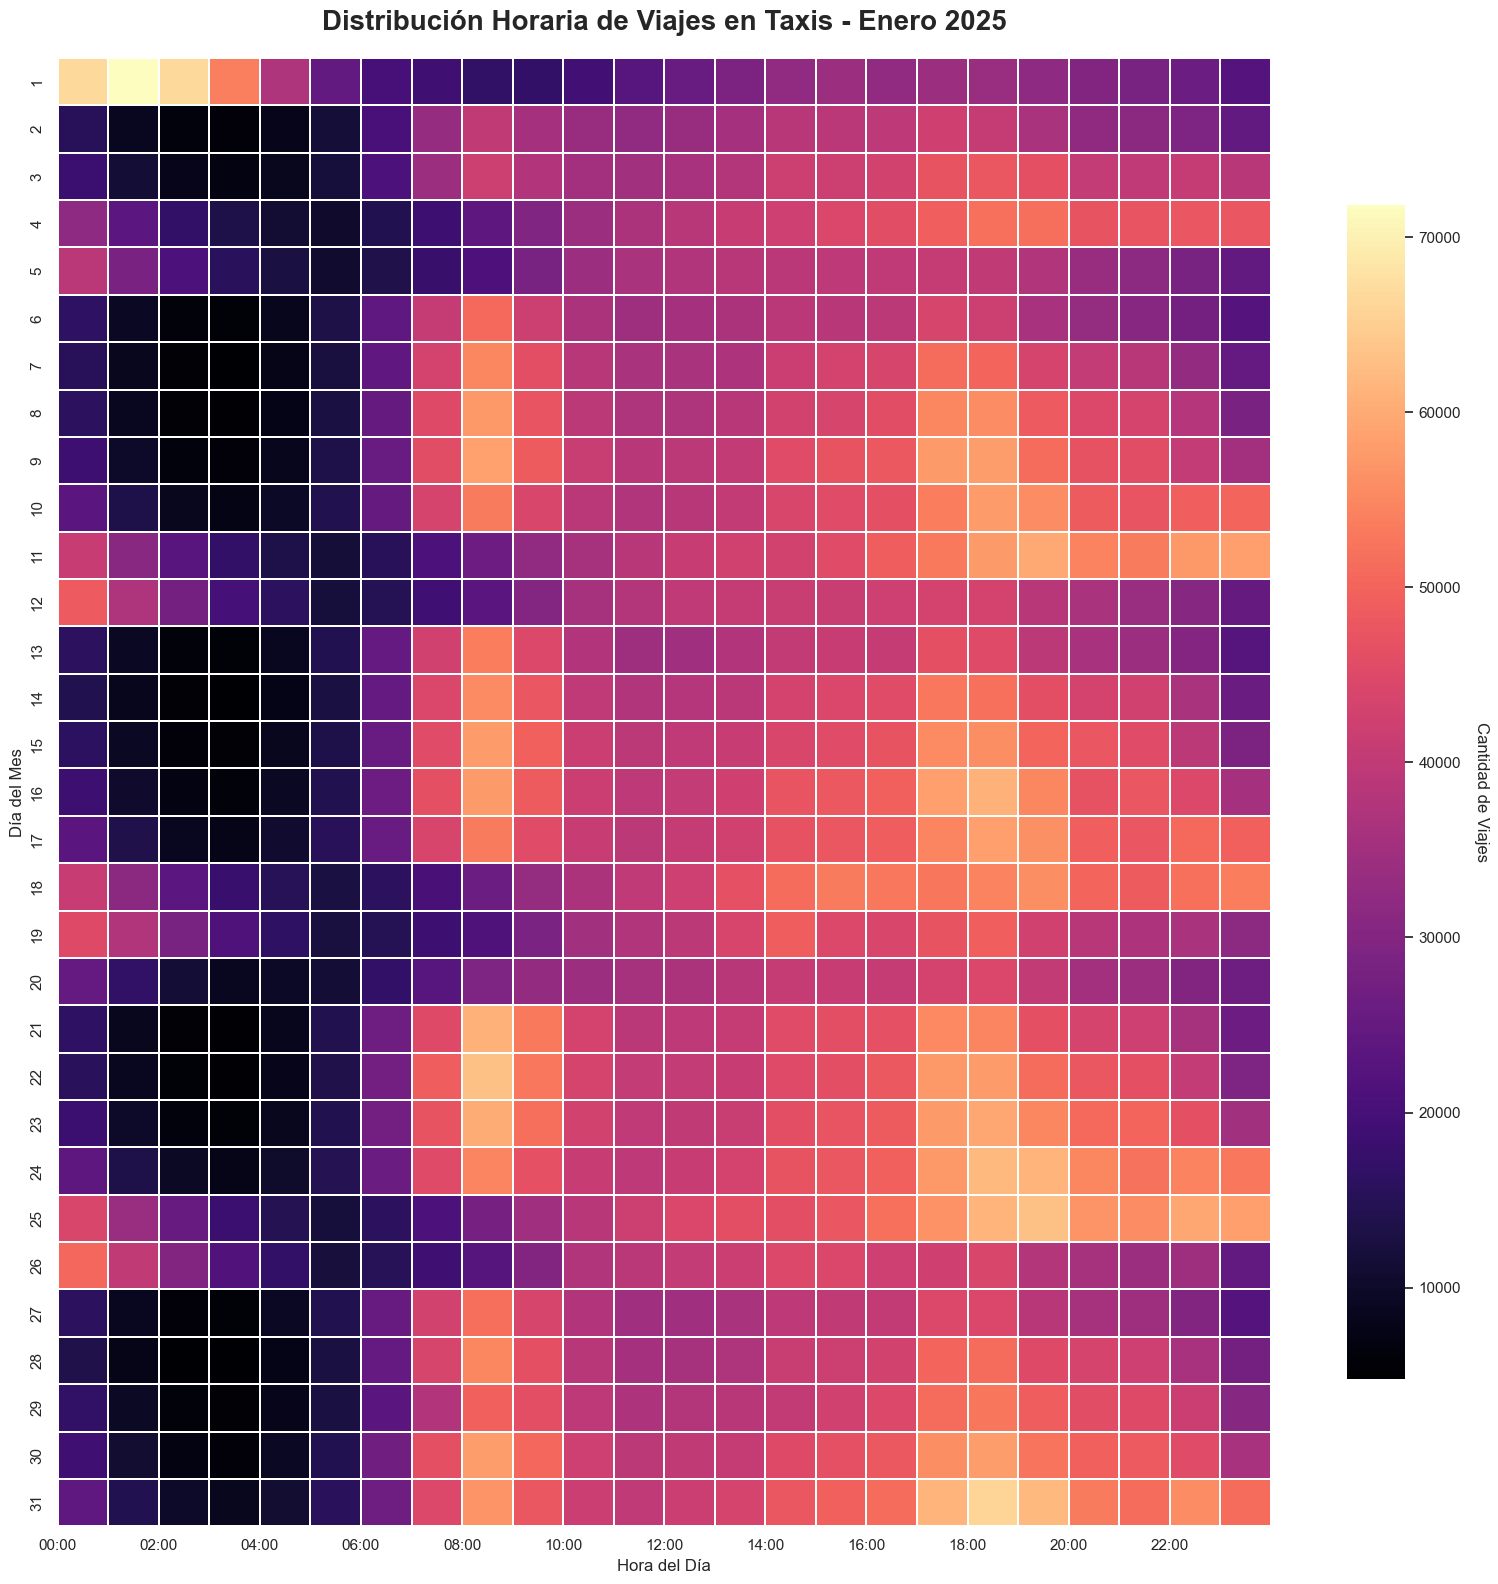

In [12]:
taxis = {
    'Yellow Taxis': (yellow_taxis_df, 'tpep_pickup_datetime'),
    'Green Taxis': (green_taxis_df, 'lpep_pickup_datetime'),
    'FHV': (fhv_df, 'pickup_datetime'),
    'FHVHV': (fhvhv_df, 'pickup_datetime')
}

all_pickups = (
    yellow_taxis_df['tpep_pickup_datetime']
    .append(green_taxis_df['lpep_pickup_datetime'])
    .append(fhv_df['pickup_datetime'])
    .append(fhvhv_df['pickup_datetime'])
)

heatmap_data = all_pickups.to_frame().with_columns([
    all_pickups.dt.hour().alias("hour"),
    all_pickups.dt.day().alias("day")
])

pivot_table = heatmap_data.group_by(["day", "hour"]).agg(pl.len()).sort(
    "day", "hour"
).rename(
    {'len': 'counts'}).pivot(
    index="day",
    on="hour",
    values="counts",
).fill_null(0)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 16))

ax = sns.heatmap(
    pivot_table.drop('day'),
    cmap='magma',
    linewidths=0.1,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de Viajes', 'shrink': 0.8}
)

plt.title('Distribución Horaria de Viajes en Taxis - Enero 2025', 
          fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Día del Mes', fontsize=12)

ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)])

days_in_january = 31
ax.set_yticks([d + 0.5 for d in range(days_in_january)])
ax.set_yticklabels([str(d + 1) for d in range(days_in_january)])

ax.collections[0].colorbar.set_label('Cantidad de Viajes', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

<Figure size 1800x1800 with 0 Axes>

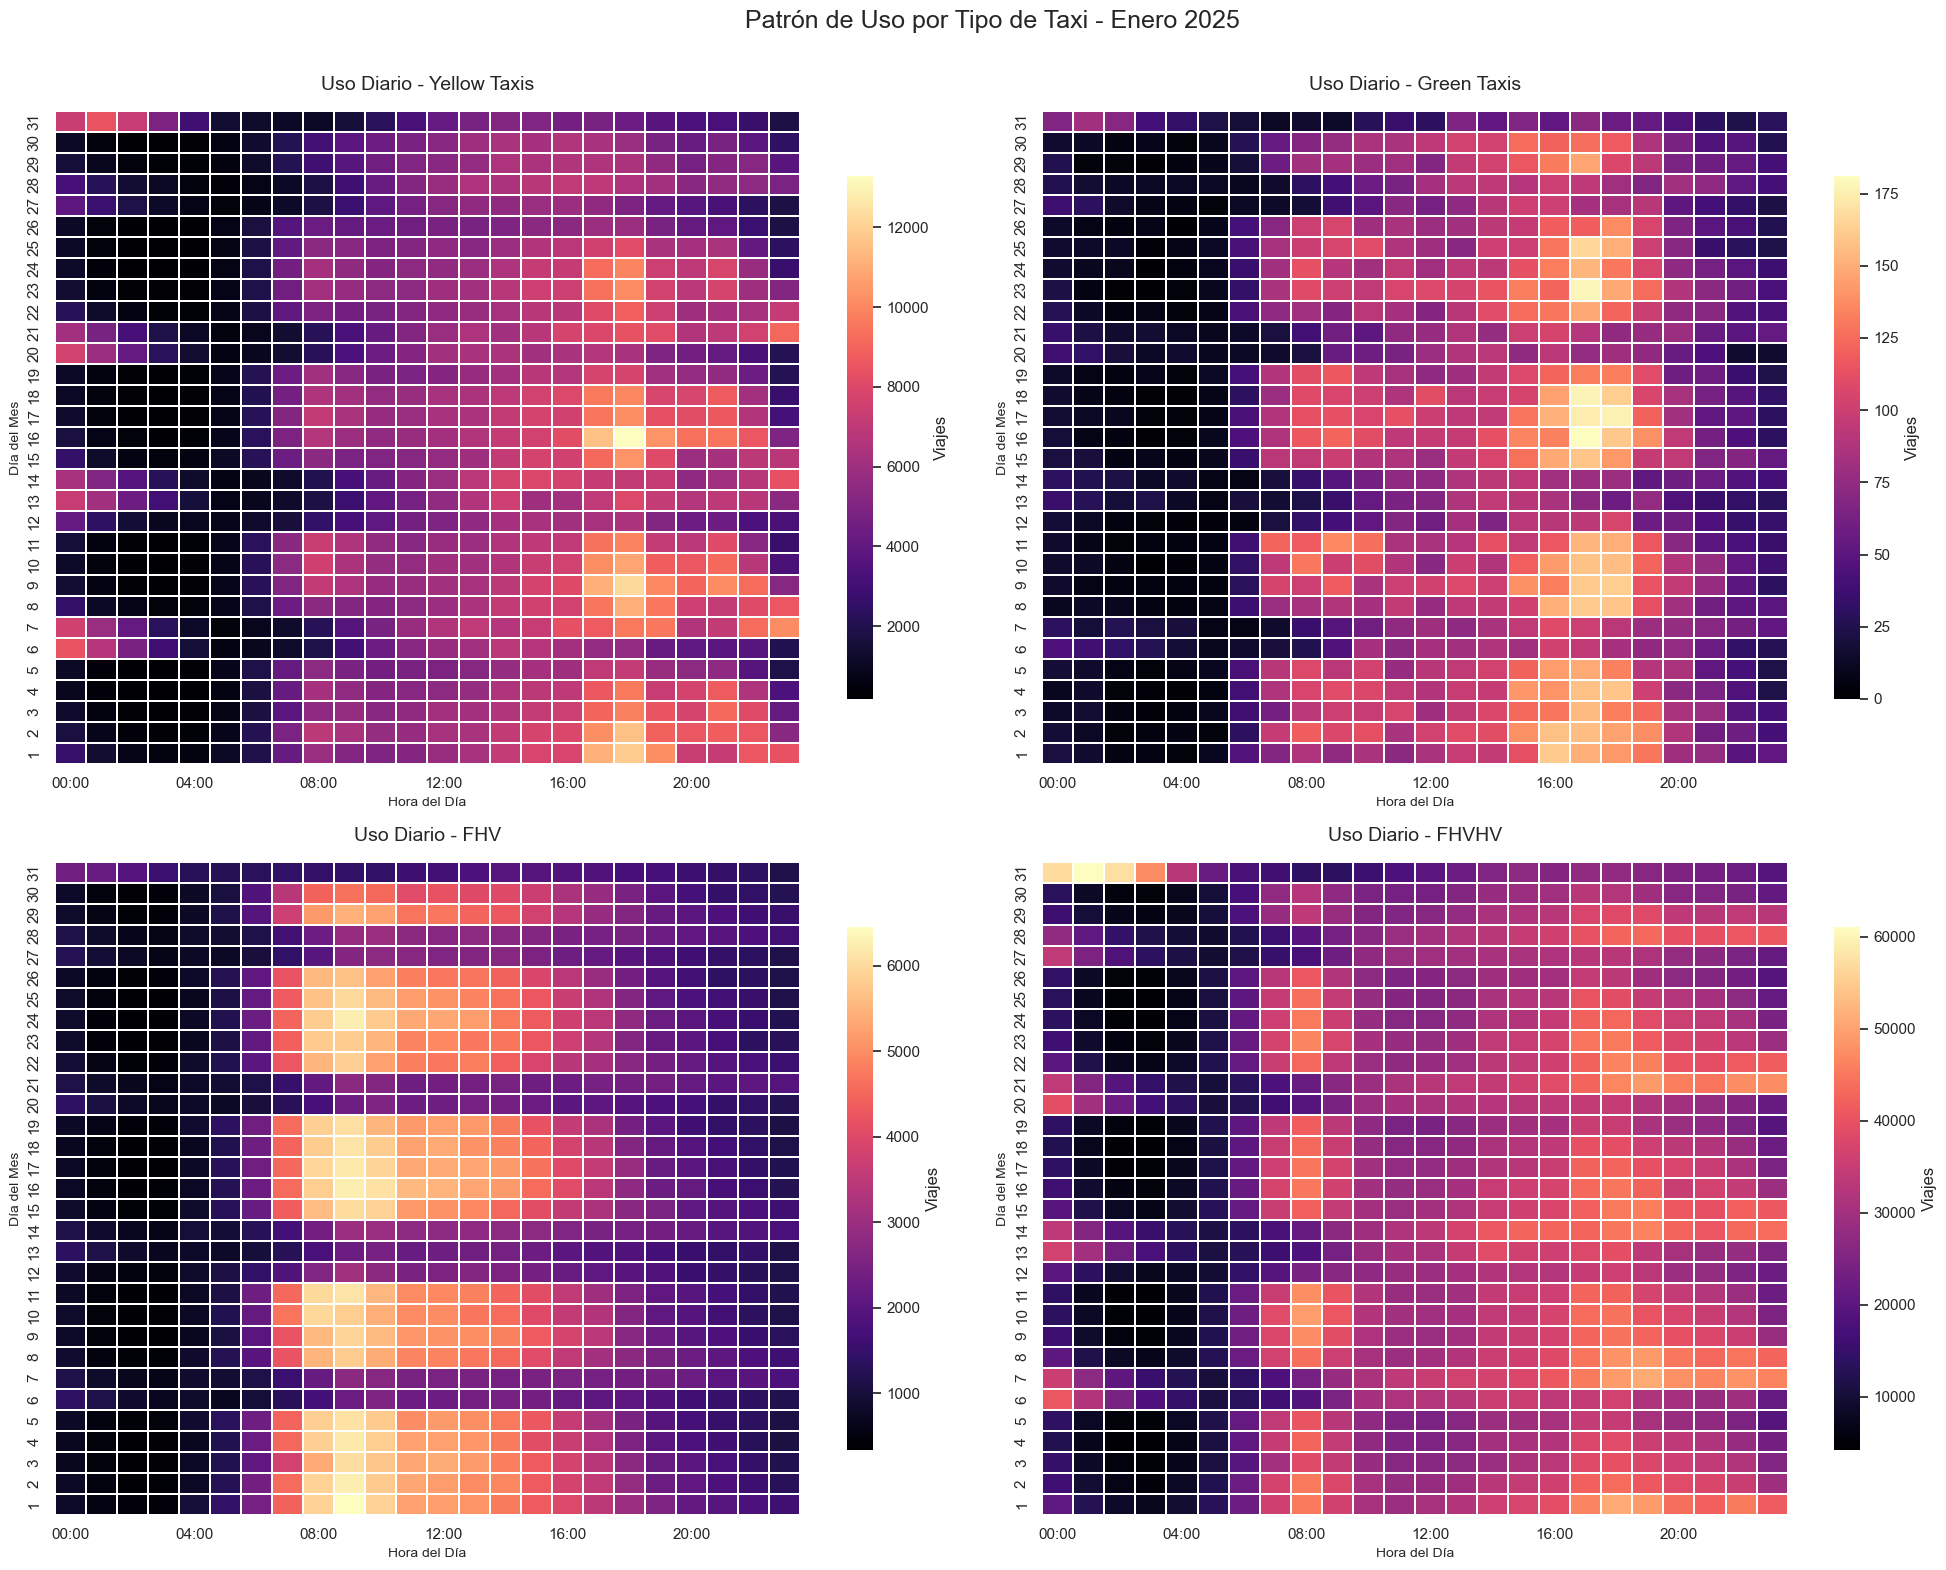

In [13]:
plt.figure(figsize=(18, 18))

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

for (taxi_name, (df, time_col)), ax in zip(taxis.items(), axes.flatten()):
    heatmap_i = df[time_col].to_frame().with_columns([
        df[time_col].dt.hour().alias("hour"),
        df[time_col].dt.day().alias("day")
    ])

    pivot_table_i = heatmap_i.group_by(["day", "hour"]).agg(pl.len()).sort(
        "day", "hour"
    ).rename(
        {'len': 'counts'}).pivot(
        index="day",
        on="hour",
        values="counts",
    ).fill_null(0)

    sns.heatmap(
        pivot_table_i.drop('day'),
        ax=ax,
        cmap='magma',
        cbar_kws={'label': 'Viajes', 'shrink': 0.8},
        linewidths=0.3,
        linecolor='white'
    )

    ax.set_title(f'Uso Diario - {taxi_name}', fontsize=14, pad=15)
    ax.set_xlabel('Hora del Día', fontsize=10)
    ax.set_ylabel('Día del Mes', fontsize=10)

    ax.set_xticks([x + 0.5 for x in range(0, 24, 4)])
    ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 4)])

    ax.set_yticks([d + 0.5 for d in range(31)])
    ax.set_yticklabels([f'{i}' for i in range(1,32)][::-1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Patrón de Uso por Tipo de Taxi - Enero 2025',
             fontsize=18, y=0.98)
plt.show()
